In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'simulation_results/clean_data/'

pid_nominal = pd.read_csv(f'{data_path}results_pid_nominal.csv')
pid_with_noise = pd.read_csv(f'{data_path}results_pid_with_noise.csv')
pid_with_disturbances = pd.read_csv(f'{data_path}results_pid_with_disturbances.csv')  
onoff_nominal = pd.read_csv(f'{data_path}results_onoff_nominal.csv')
onoff_with_noise = pd.read_csv(f'{data_path}results_onoff_with_noise.csv')
onoff_with_disturbances = pd.read_csv(f'{data_path}results_onoff_with_disturbances.csv')
fuzzy_nominal = pd.read_csv(f'{data_path}results_fuzzy_nominal.csv')
fuzzy_with_noise = pd.read_csv(f'{data_path}results_fuzzy_with_noise.csv')
fuzzy_with_disturbances = pd.read_csv(f'{data_path}results_fuzzy_with_disturbances.csv')

data = {
    "pid_nominal": pid_nominal,
    "pid_with_noise": pid_with_noise,
    "pid_with_disturbances": pid_with_disturbances,
    "onoff_nominal": onoff_nominal,
    "onoff_with_noise": onoff_with_noise,
    "onoff_with_disturbances": onoff_with_disturbances,
    "fuzzy_nominal": fuzzy_nominal,
    "fuzzy_with_noise": fuzzy_with_noise,
    "fuzzy_with_disturbances": fuzzy_with_disturbances
   }





--- Nominal ---



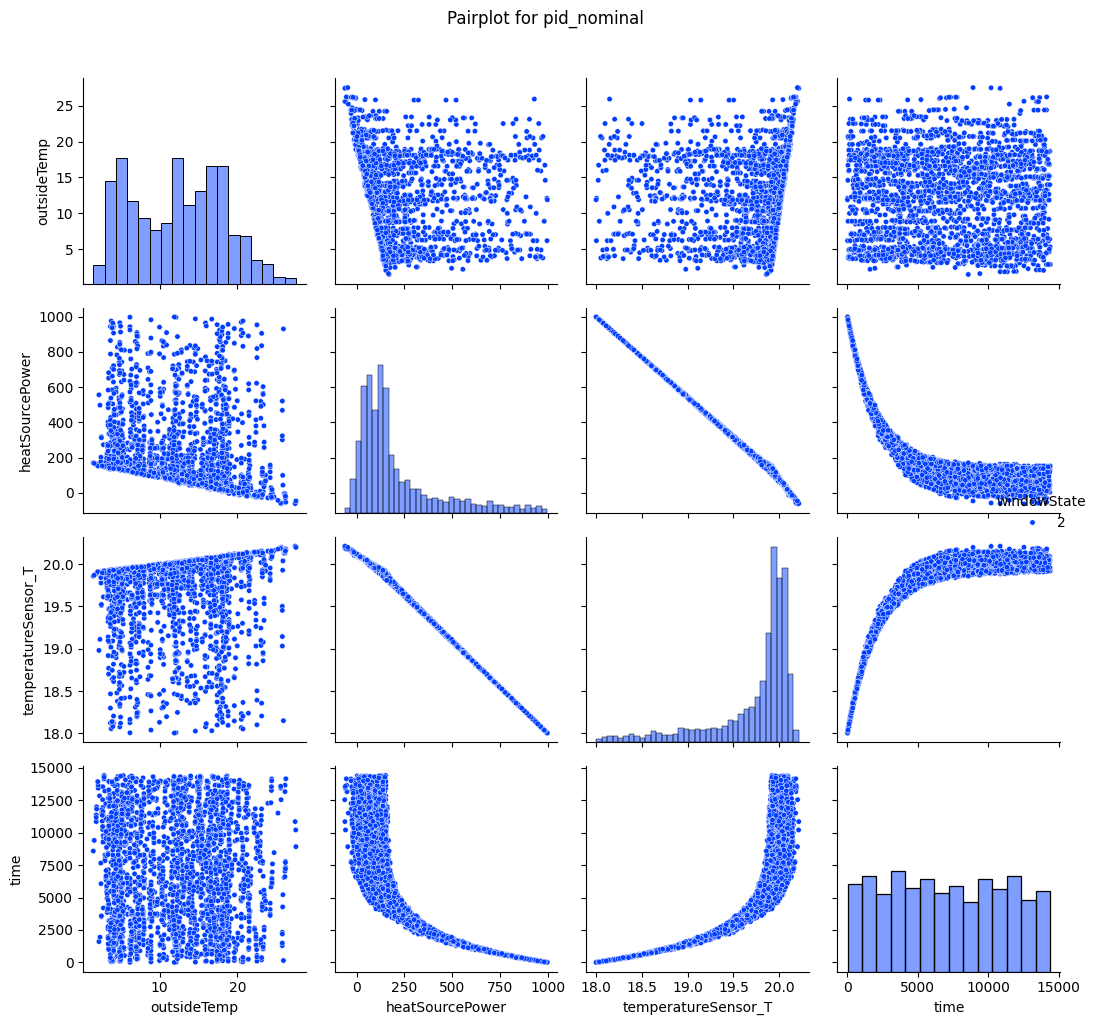

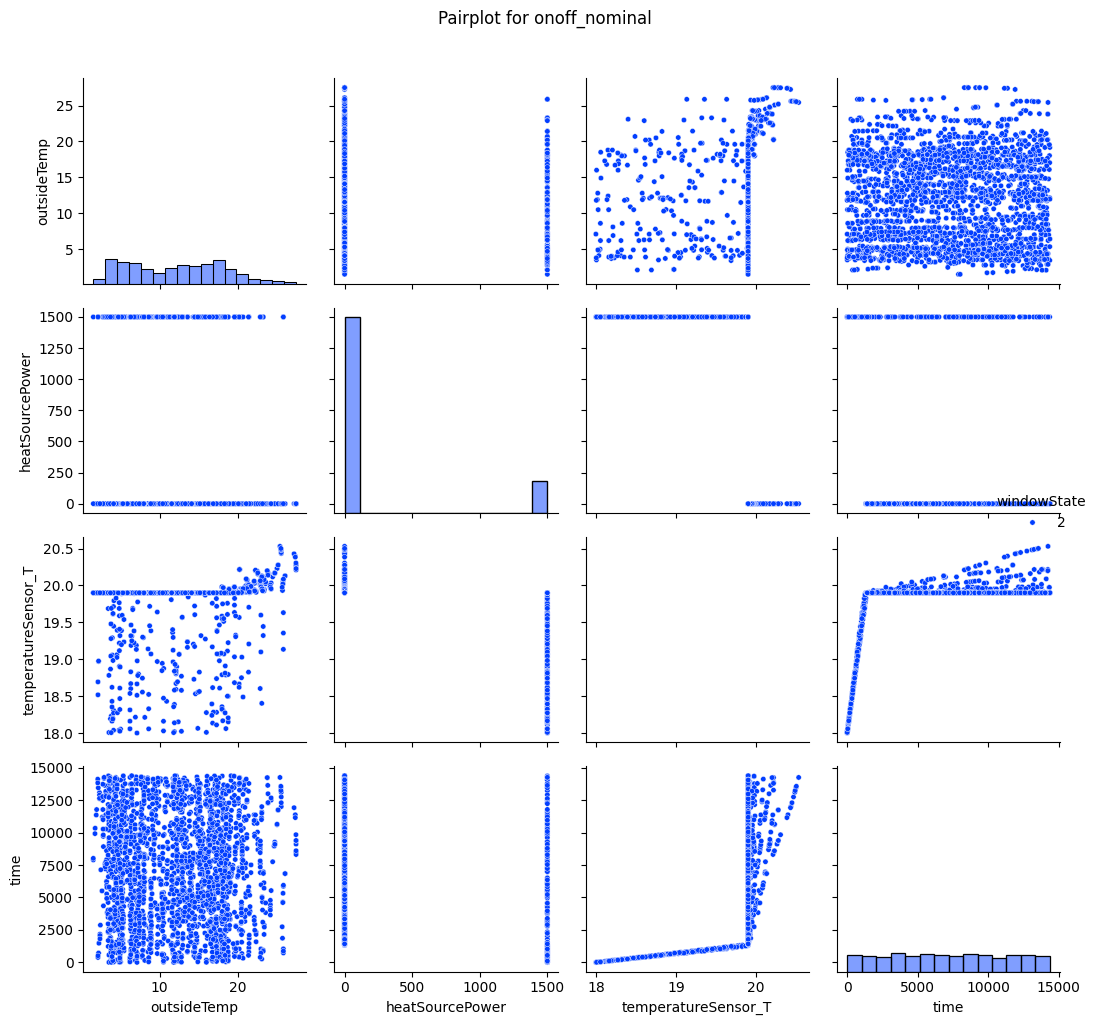

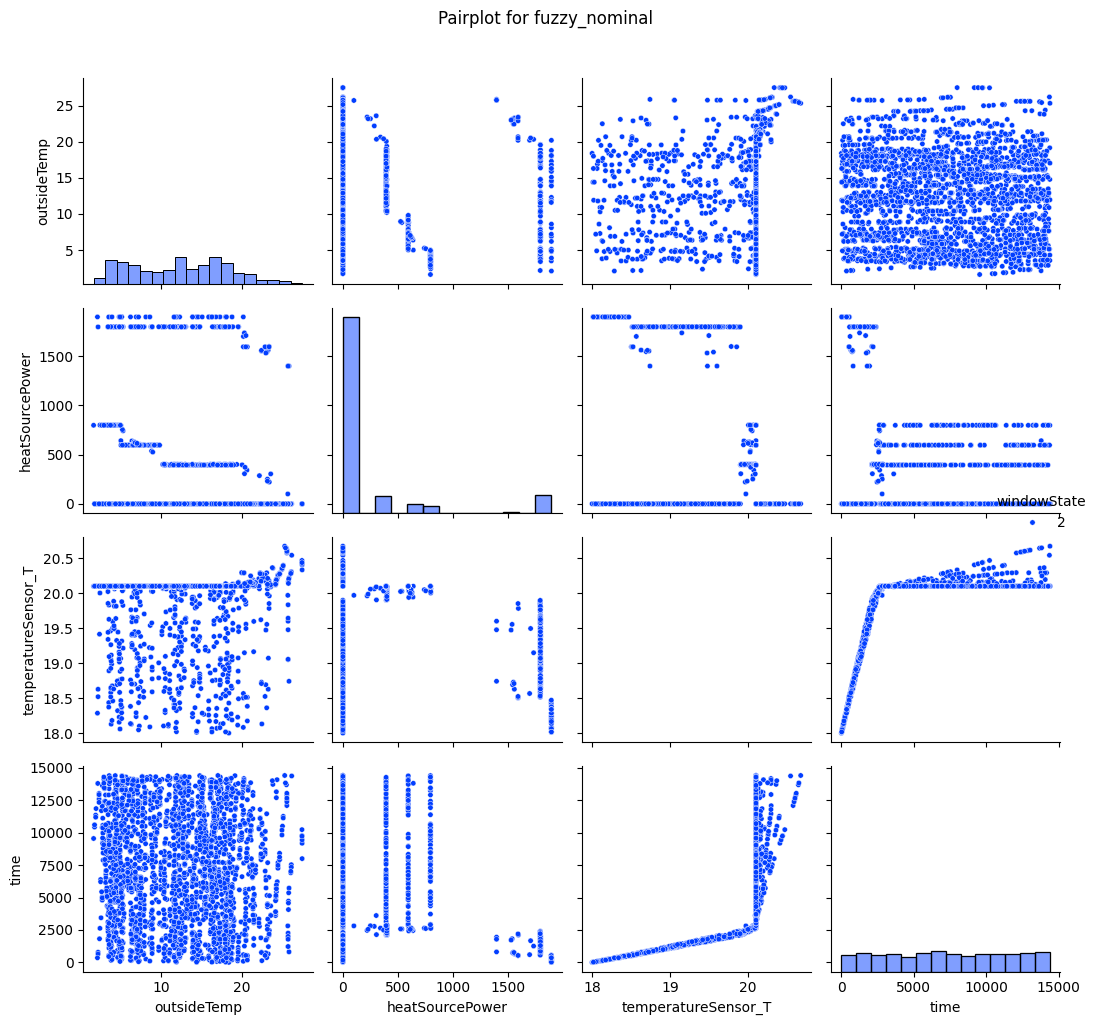


--- With Noise ---



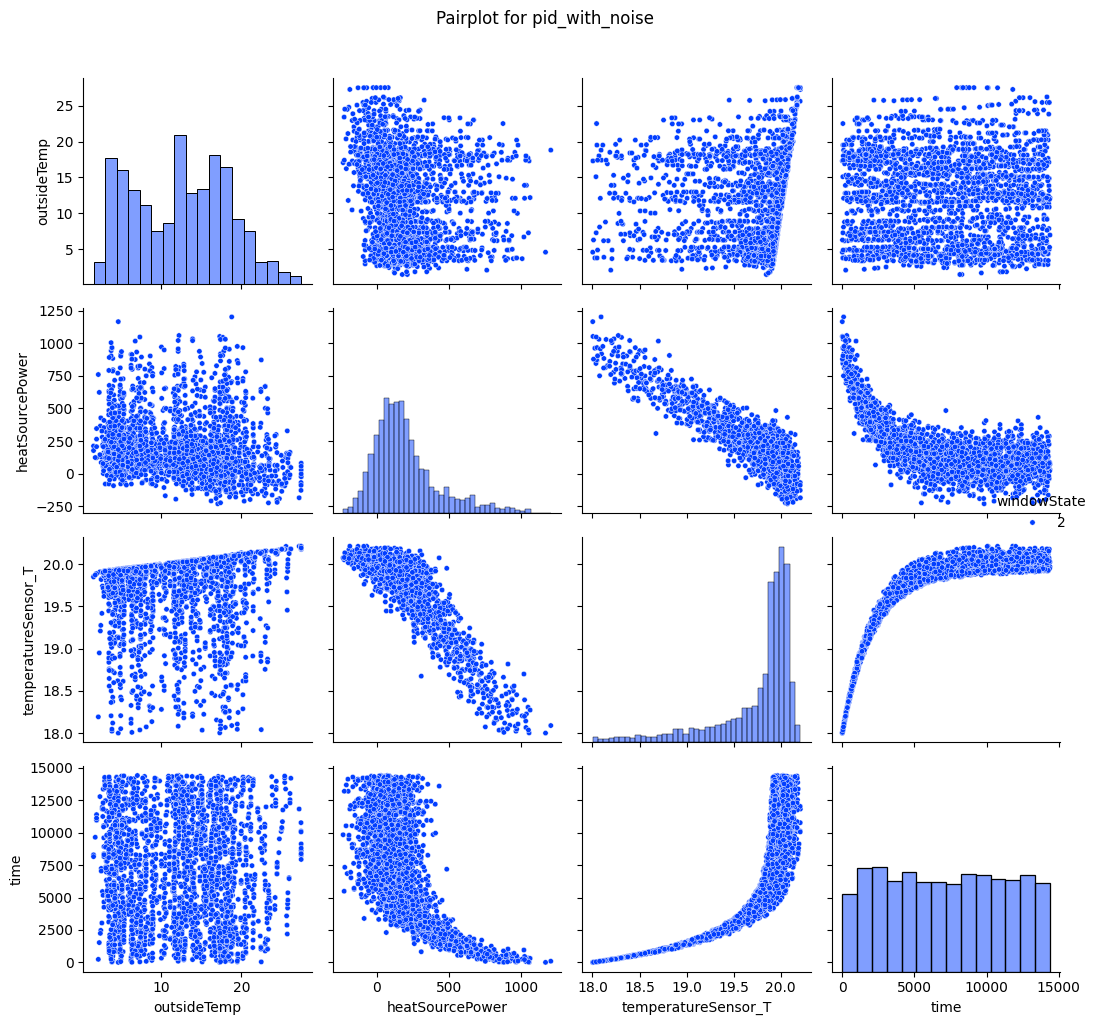

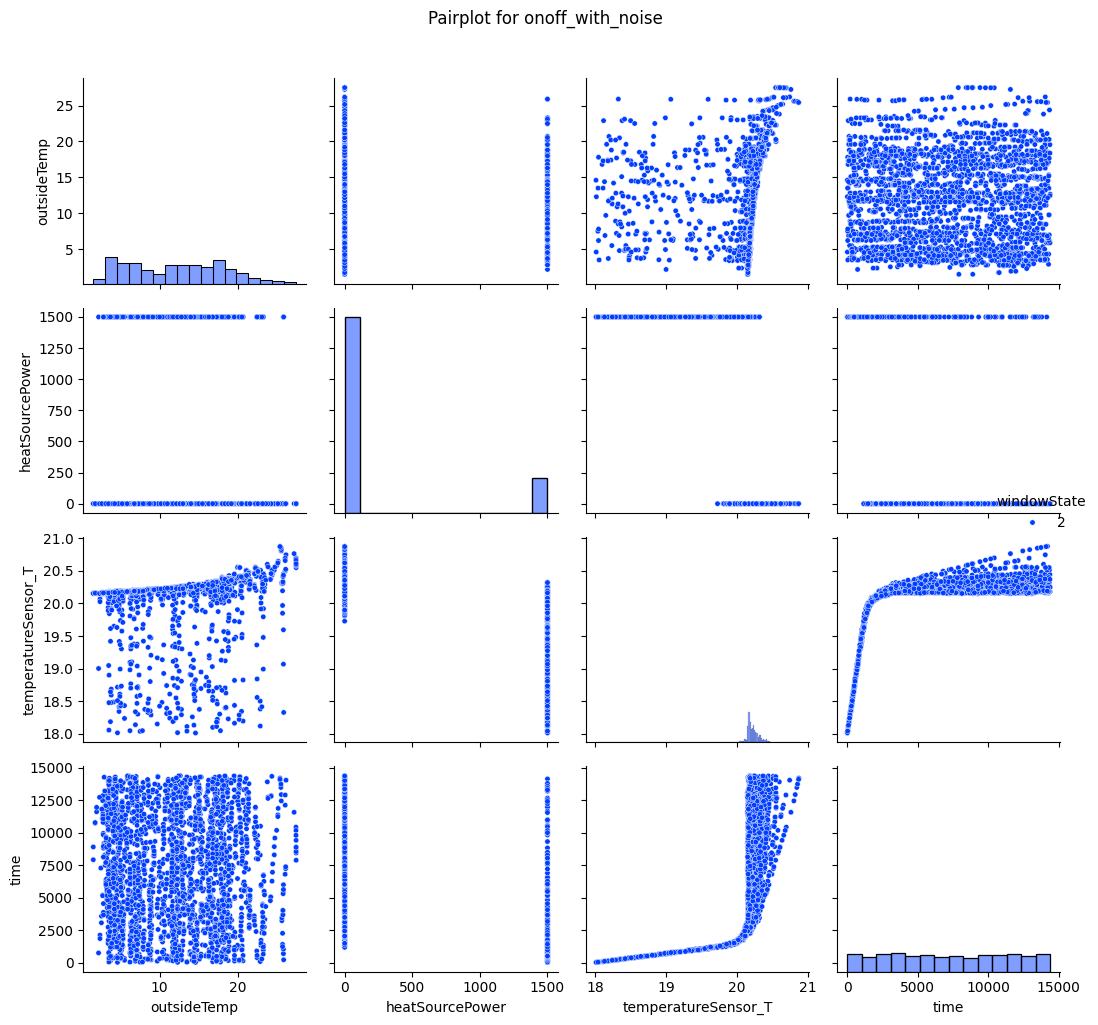

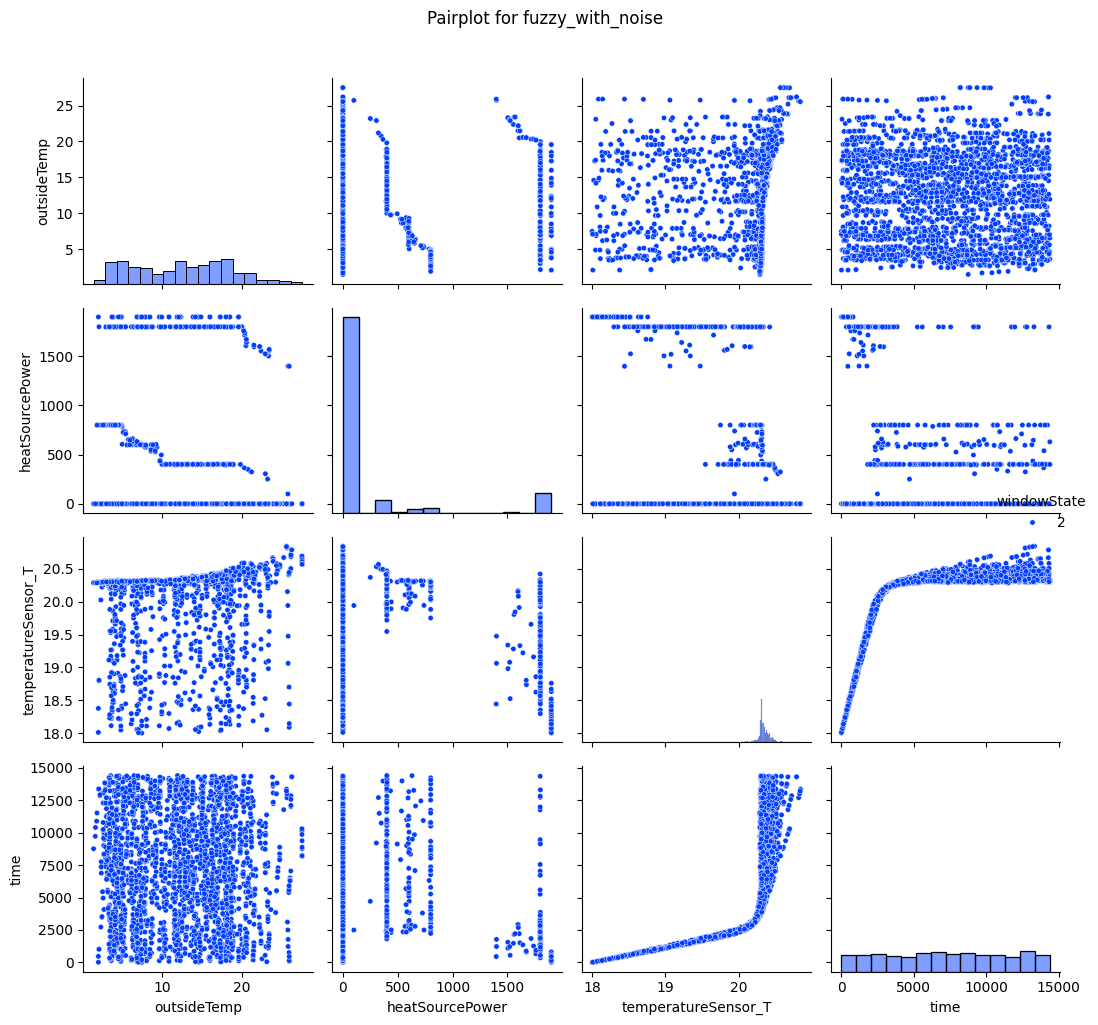


--- With Disturbances ---



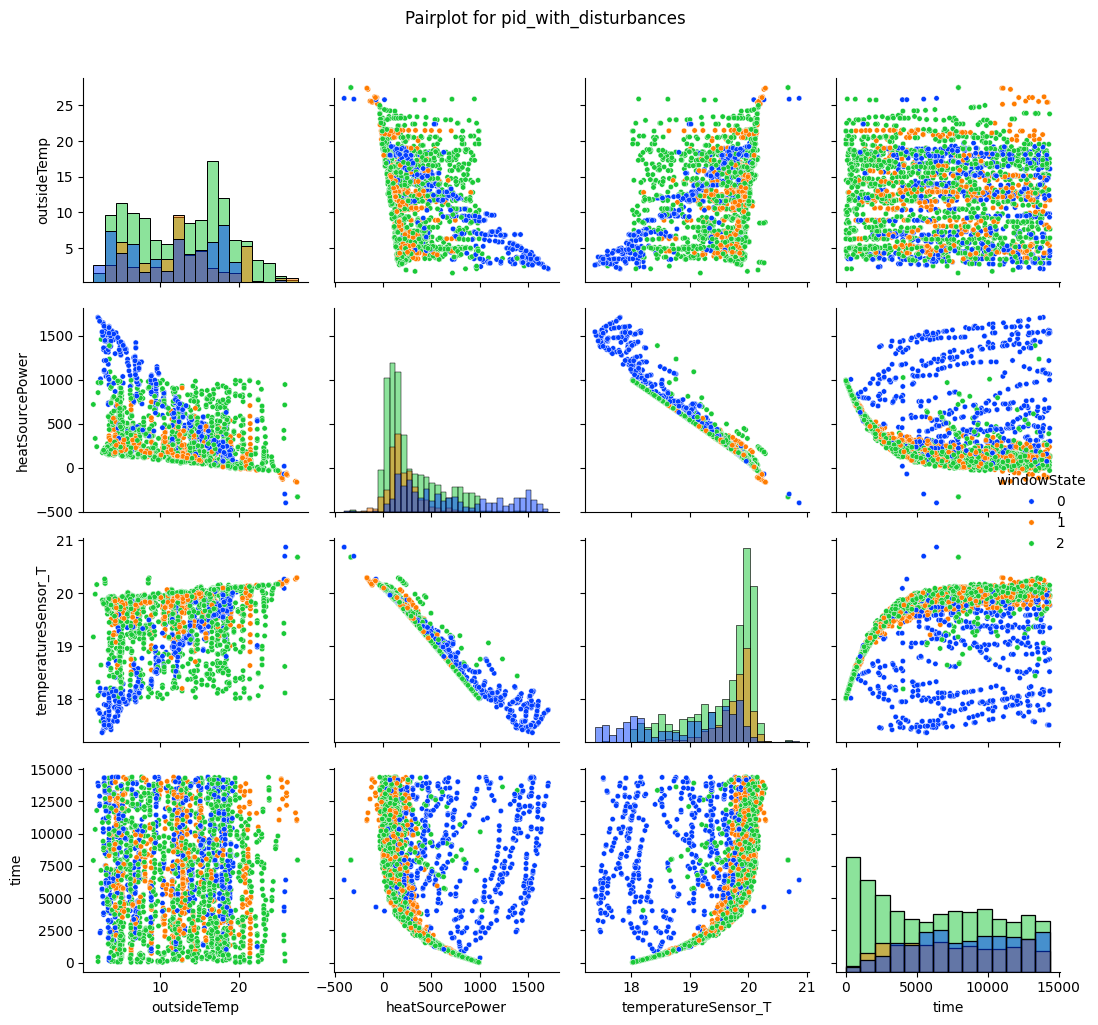

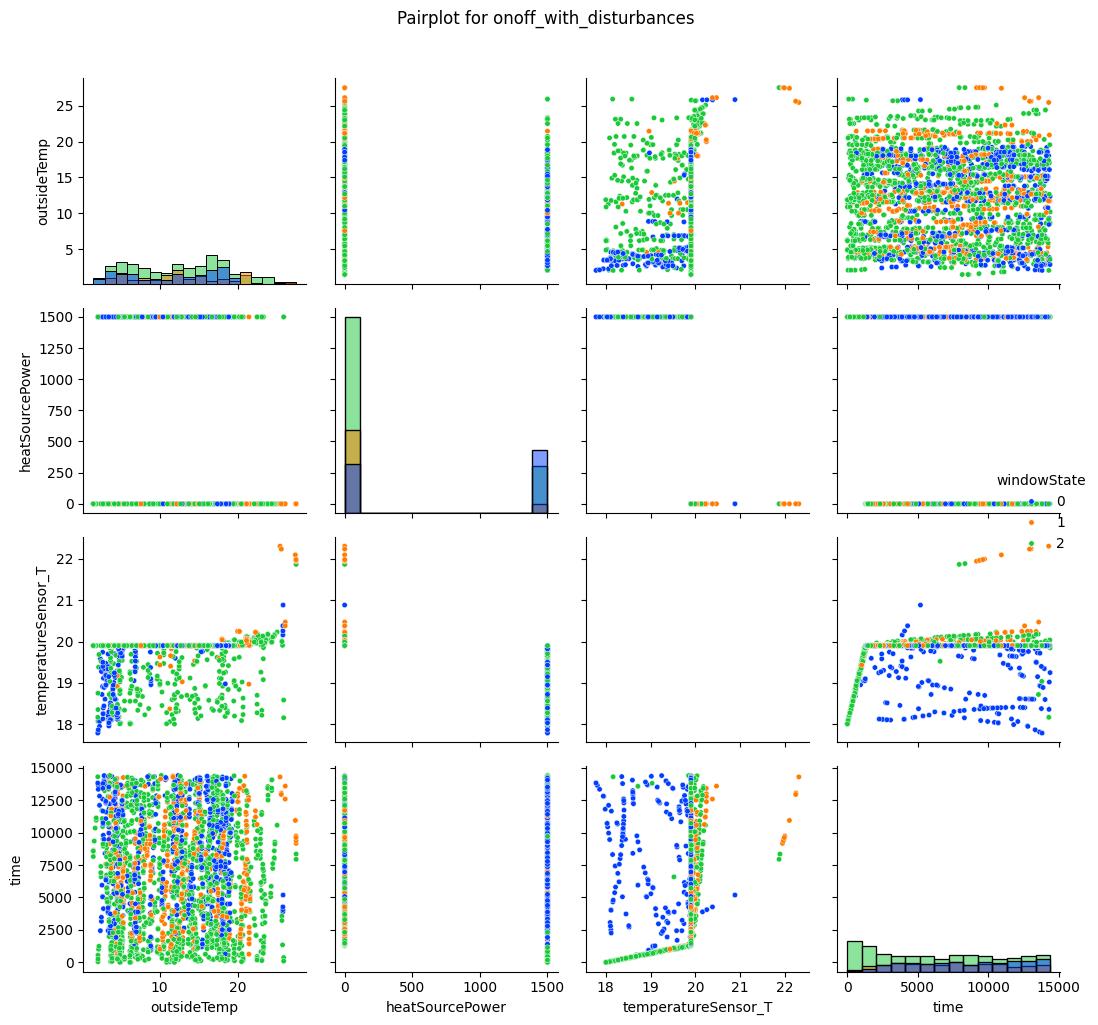

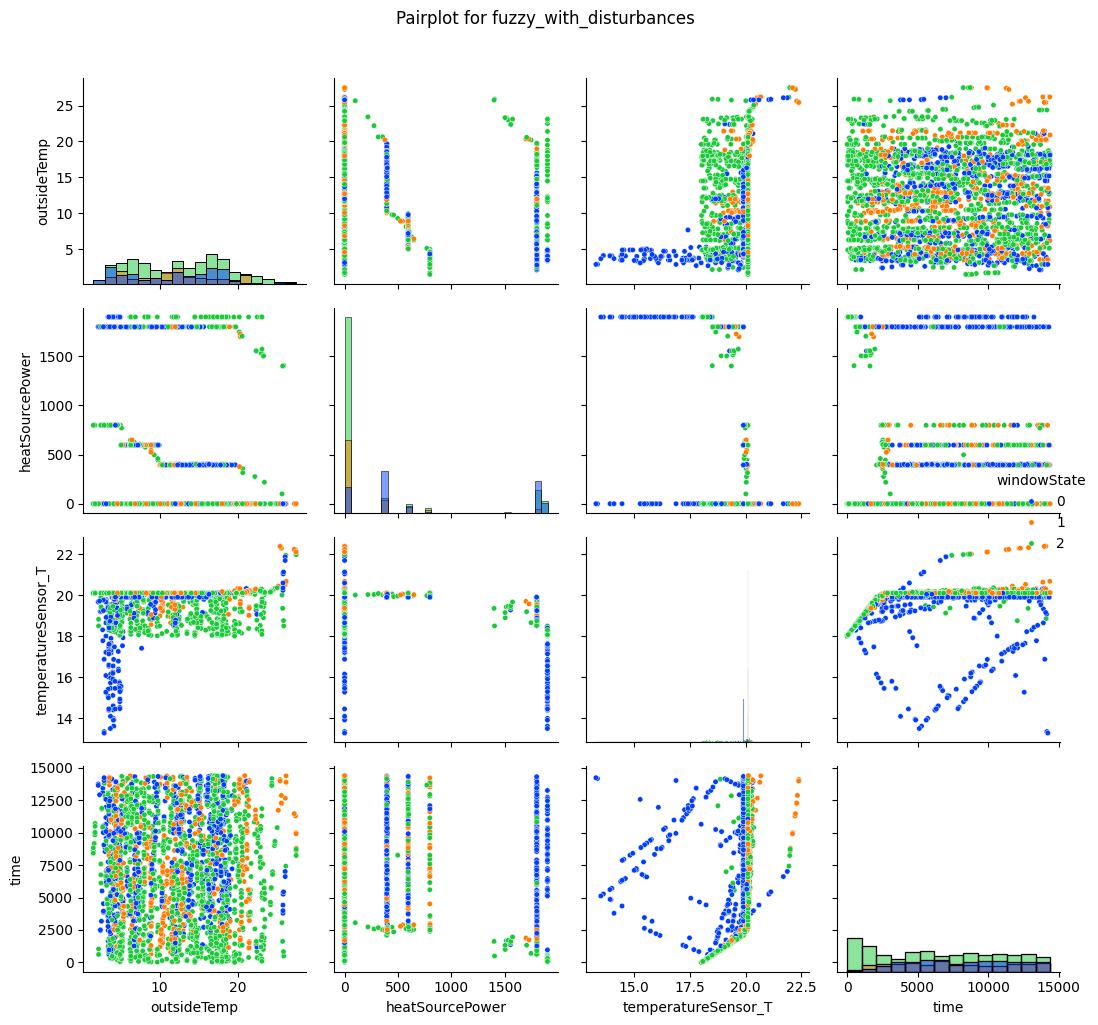

In [4]:
groups = {
    "Nominal": ['pid_nominal', 'onoff_nominal', 'fuzzy_nominal'],
    "With Noise": ['pid_with_noise', 'onoff_with_noise', 'fuzzy_with_noise'],
    "With Disturbances": ['pid_with_disturbances', 'onoff_with_disturbances', 'fuzzy_with_disturbances']
}

for group_name, keys in groups.items():
    print(f"\n--- {group_name} ---\n")  # Just a visual separator in console
    for key in keys:
        df = data[key]
        subset = df #[df['simulation_run'] % 5 == 0]
        
        g = sns.pairplot(
            subset[['outsideTemp', 'heatSourcePower', 'temperatureSensor_T', 'windowState', 'time']].sample(2500),
            kind='scatter',
            hue='windowState',
            palette='bright',
            diag_kind='hist',
            plot_kws={'s': 15}
        )
        g.fig.suptitle(f"Pairplot for {key}", y=1.02)
        g.fig.tight_layout()
        plt.show()  # Shows each figure immediately


NaNs: 0
Infs: 0


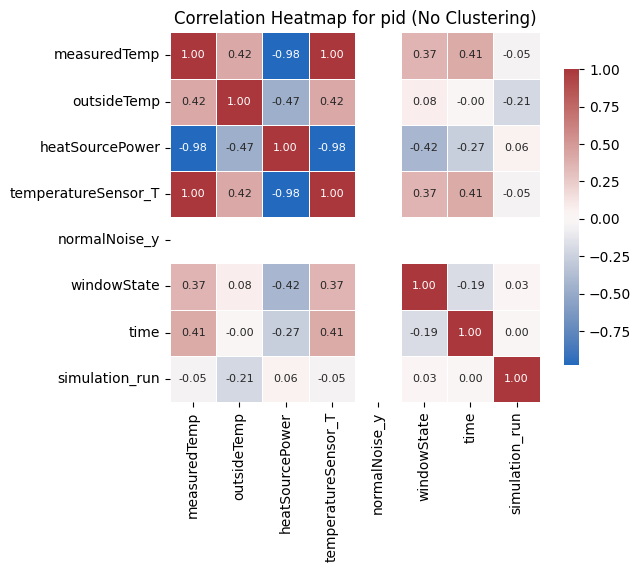

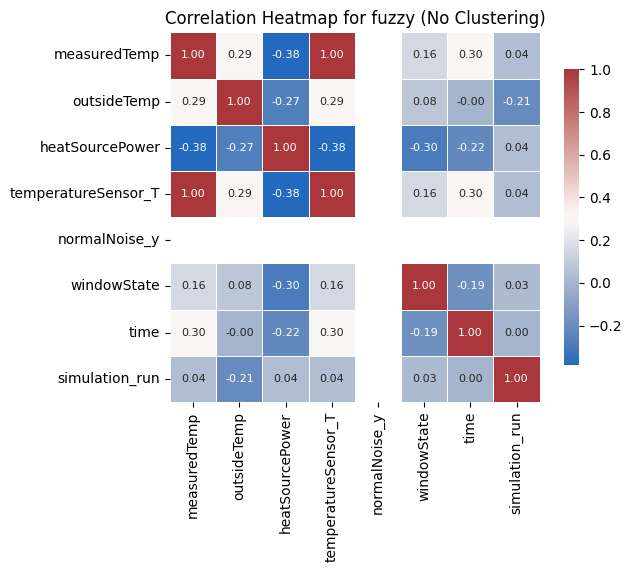

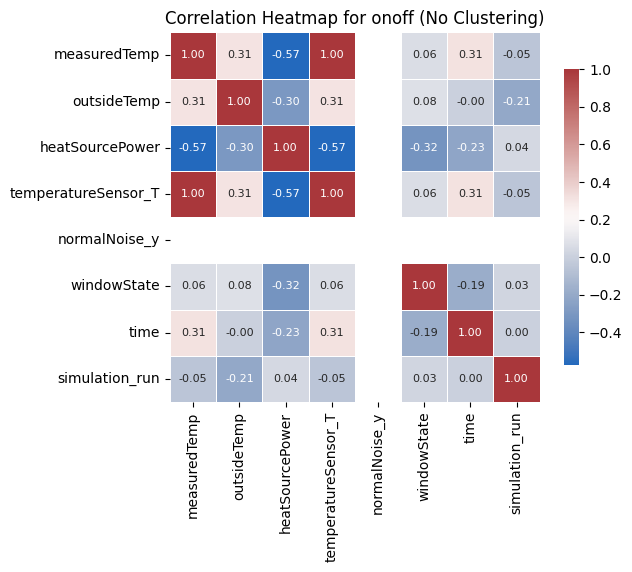

In [3]:
import numpy as np

# Detect non-finite values
print("NaNs:", pid_nominal.isnull().sum().sum())
print("Infs:", np.isinf(pid_nominal).sum().sum())


#sns.clustermap(pid_with_disturbances, cmap="vlag", annot=True,
#               row_cluster=False, col_cluster=False)
#plt.title("Correlation Heatmap (No Clustering)")
#plt.show()

sns.heatmap(pid_with_disturbances.corr(), cmap="vlag", annot=True,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for pid (No Clustering)")
plt.show()

sns.heatmap(fuzzy_with_disturbances.corr(), cmap="vlag", annot=True,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for fuzzy (No Clustering)")
plt.show()

sns.heatmap(onoff_with_disturbances.corr(), cmap="vlag", annot=True,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for onoff (No Clustering)")
plt.show()
